## 회귀
- 출력층 units = 1, activation = 'linear'
- loss = MSE(평균제곱오차)

# 분류
## 이진분류
- 출력층 units = 1, activation = 'sigmoid'
- loss = 'binary_crossentropy'

## 다중분류
- 출력층 units = 클래스의 수, activation = 'softmax'
- loss = 'categorical_crossentropy'

### 목표
- 신경망을 활용하여 다중 분류에 필요한 keras의 기능을 활용해보자!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

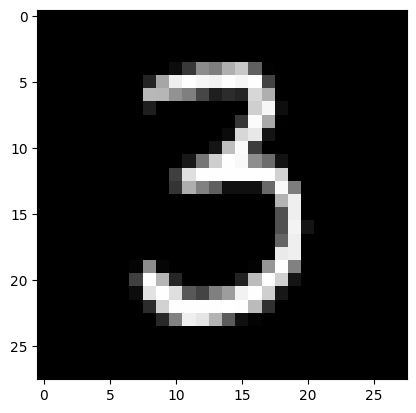

In [ ]:
# 50번째 이미지 확인해보기
plt.imshow(X_train[50], cmap = 'gray')
plt.show()

In [ ]:
y_train[50]

3

In [ ]:
# 클래스의 개수 확인 - 10개
print(np.unique(y_train))
print(np.unique(y_train).size)
print(np.unique(y_train, return_counts = True))

[0 1 2 3 4 5 6 7 8 9]
10
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


### MLP 신경망 설계

In [ ]:
y_train_one_hot = pd.get_dummies(y_train)
y_test_one_hot = pd.get_dummies(y_test)

# 크기확인
print(y_train_one_hot.shape)
print(y_test_one_hot.shape)
# from tensorflow.keras.utils import to_categorical

(60000, 10)
(10000, 10)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
X_train2 = X_train.reshape(60000, 28*28)
X_test2 = X_test.reshape(10000, 28*28)

In [ ]:
X_test.reshape(10000, 28*28).shape

(10000, 784)

In [ ]:
model_mlp = Sequential()
model_mlp.add(Dense(300, input_dim = 784, activation = 'relu'))
model_mlp.add(Dense(200, activation = 'relu'))
model_mlp.add(Dense(50, activation = 'relu'))

model_mlp.add(Dense(10, activation='softmax'))

In [ ]:
# 학습/평가 방법 설정
model_mlp.compile(loss='sparse_categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])

In [ ]:
# 학습
mlp_history = model_mlp.fit(X_train2, y_train, validation_split=0.3,
                            epochs = 50)

In [ ]:
plt.figure(figsize = (10,4))

plt.plot(mlp_history.history['accuracy'], label='acc')
plt.plot(mlp_history.history['val_accuracy'], label='val_acc')

plt.legend()
plt.show()

In [ ]:
pre =model_mlp.predict(X_test2[1:2])
print(pre)
print('예측한 숫자 :', pre.argmax()) # 최대값 위치 반환
print('실제 답 : ', y_test[1])

1/1 [==============================] - 0s 109ms/step
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
예측한 숫자 : 2
실제 답 :  2


### CNN 모델 설계

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, InputLayer

In [ ]:
from os import mkdir
# CNN 모델 -> cnn(특징 찾기!) + mlp(분류)
# cnn : 이미지 내의 중요 요소, 특징을 찾아내어 학습에 적용시켜줌!
# 위치, 크기에 덜 민감하게 작용 -> 정확도, 성능이 높은 모델링!

model_cnn = Sequential()  # 뼈대 구축

# 입력층
model_cnn.add(InputLayer(input_shape = (28,28,1))) # 흑백 : 1, 컬러 : 3

# cnn - 특성추출부
# 커널 갯수(돋보기 갯수) : 32, 커널 크기(돋보기 크기) : (4,4)
model_cnn.add(Conv2D(32, kernel_size = (4,4), padding = 'same', activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))

model_cnn.add(Conv2D(64, kernel_size = (4,4), padding = 'same', activation = 'relu'))
model_cnn.add(MaxPooling2D(pool_size=(2,2)))


# 이전까지는 2차원, 찾은 특징을 통해 분류할 수 있도록 1차원으로 펴주어야함
model_cnn.add(Flatten())

# mlp층(분류, 예측부)
model_cnn.add(Dense(128, activation='relu'))

# 출력층
model_cnn.add(Dense(10, activation='softmax'))

In [ ]:
# 모델 구조 확인
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [ ]:
model_cnn.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
# 학습
cnn_history = model_cnn.fit(X_train, y_train,
                            validation_split = 0.3,
                            epochs = 50)

Epoch 1/50
1313/1313 [==============================] - 17s 5ms/step - loss: 0.3132 - accuracy: 0.9452 - val_loss: 0.0871 - val_accuracy: 0.9731
Epoch 2/50
1313/1313 [==============================] - 7s 5ms/step - loss: 0.0608 - accuracy: 0.9821 - val_loss: 0.0659 - val_accuracy: 0.9804
Epoch 3/50
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0487 - accuracy: 0.9853 - val_loss: 0.0861 - val_accuracy: 0.9749
Epoch 4/50
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0388 - accuracy: 0.9884 - val_loss: 0.0762 - val_accuracy: 0.9806
Epoch 5/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0677 - val_accuracy: 0.9822
Epoch 6/50
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0341 - accuracy: 0.9898 - val_loss: 0.0913 - val_accuracy: 0.9819
Epoch 7/50
1313/1313 [==============================] - 6s 5ms/step - loss: 0.0276 - accuracy: 0.9917 - val_loss: 0.0787 - val_accuracy

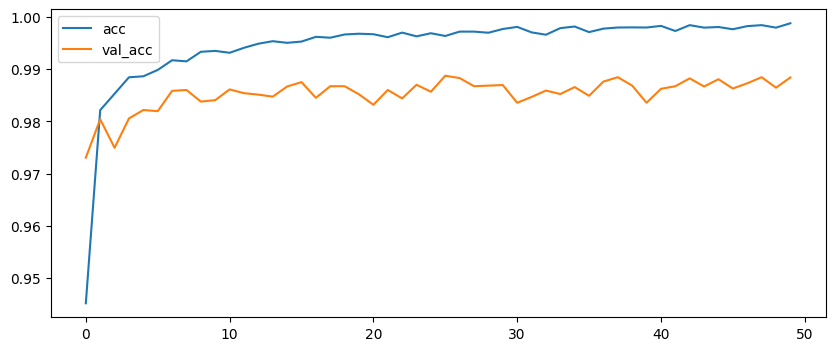

In [ ]:
# 시각화 해보기
plt.figure(figsize = (10,4))

plt.plot(cnn_history.history['accuracy'], label='acc')
plt.plot(cnn_history.history['val_accuracy'], label='val_acc')

plt.legend()
plt.show()